In [92]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


### Let's Get a feel for training and testing data

 getting a feel for the data is very important so you know how to work with it. We've randomly initialized some numbers and print their values. It's also important to note how the outputs are stored (are they one-hot encoded) or printed in base ten in a normal array. Clarifying through this well help us better understand our data and see what possible conversions we may have to do!

Random Index: 11906
Shape of image: (28, 28)


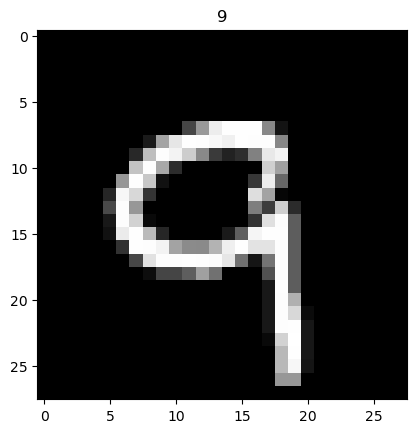

In [93]:
# y = w x + b
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

randomIndx = np.random.randint(60000)
print(f"Random Index: {randomIndx}")
plt.imshow(x_train[randomIndx].reshape(28,28), cmap = 'gray')
plt.title(y_train[randomIndx])
print(f"Shape of image: {np.shape(x_train[randomIndx])}")

## We should note a couple things:

Size of the images ar (28,28). Note the single channel. There are no 3 Dimensions. Knowing this will be helpful when we set up our Network.
The outputs ( y_test and y_train) are both column arrays that contain the VALUE of the output. This is helpful because now we know how to manage conversion of this data (if we have to ... we haven't made that decision yet).

In [94]:
# y = w x + b
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# a two-layer net using the Dense layer and Sequential Model.
model = keras.Sequential([
    layers.Dense(512 , activation="relu"),
    layers.Dense(12, activation ="softmax")
])

# compile the network and training the neural network.
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Scale images to the [0, 1] range.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
x_test = x_test / 255.0


model.fit(x_train, y_train , epochs = 20 , batch_size= 2048)
model.save('kwon_mn_mnist')

# Testin the network with the first 12 samples in the test set.
test_digits = x_test[:12]
# Using predict() function to test.
predictions = model.predict(test_digits)

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.7078 - accuracy: 0.8044
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3233 - accuracy: 0.9095
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2530 - accuracy: 0.9279
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2086 - accuracy: 0.9397
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1737 - accuracy: 0.9504
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1503 - accuracy: 0.9574
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1301 - accuracy: 0.9631
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1145 - accuracy: 0.9673
Epoch 9/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1003 - accuracy: 0.9718
Epoch 10/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0889 - accuracy: 0.9747
Epoch 11/

In [95]:
# evaluate the model 
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

Test loss: 0.06791908293962479
Test accuracy: 0.9785000085830688


In [96]:
print(predictions)
tempList = []

#this loop iterates through y_test and converts a format so we can compare to our predictions
for row in y_test:
    tempClass = np.argmax(row)
    tempList.append(tempClass)


y_testClasses = np.array(tempList)
print(y_testClasses)

[[3.8378133e-07 5.1037013e-08 3.0158499e-05 5.7278824e-04 7.9396987e-09
  3.0775089e-07 3.9377681e-12 9.9937409e-01 4.6171731e-06 1.7617436e-05
  3.2540043e-13 1.1638200e-12]
 [1.4516527e-07 2.8639150e-04 9.9970907e-01 2.5809784e-06 9.2540281e-14
  1.3502996e-07 1.9386766e-07 1.3961279e-12 1.4113841e-06 4.1435431e-12
  1.2857725e-17 1.7521152e-16]
 [1.3839851e-06 9.9894375e-01 9.6518917e-05 2.5919759e-05 2.9890130e-05
  4.3487412e-06 1.1686449e-05 5.8537634e-04 2.9787418e-04 3.2676505e-06
  6.2903605e-10 9.8237973e-10]
 [9.9996567e-01 5.0656862e-08 1.5434563e-05 6.4489058e-08 5.9206570e-07
  4.7359809e-08 4.8085212e-06 9.5066007e-06 6.2357723e-09 3.8143405e-06
  2.0421139e-15 2.5473627e-15]
 [2.8023303e-06 2.8733140e-08 6.5960958e-06 1.8752395e-07 9.9834073e-01
  1.7840244e-07 6.6024527e-06 1.7947343e-05 7.8809380e-06 1.6170959e-03
  7.6989838e-12 1.3859771e-11]
 [3.6261802e-08 9.9965167e-01 6.2047224e-07 8.7602052e-07 2.3580822e-06
  1.2635814e-08 2.8851540e-08 3.3797271e-04 6.1458636

In [97]:
wrongPredictionIndexes = []
i = 0
for actual, prediction in zip('y_testClasses', predictions):
    if actual != prediction:
        wrongPredictionIndexes.append(i)
    i = i + 1
    

/var/folders/nj/5n17tpm16j1dszf8dzt_qfj00000gn/T/ipykernel_1446/520354650.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if actual != prediction:


 Example -1


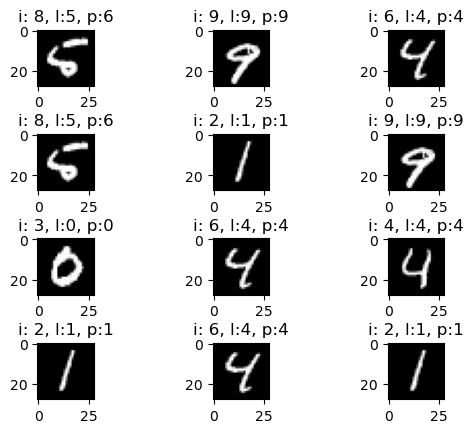

 Example -2


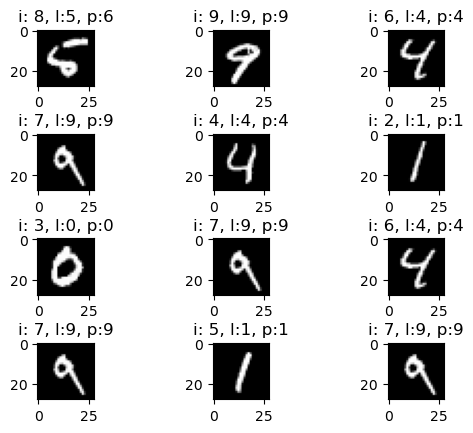

In [98]:
# plotting 12 tests
print(f' Example -1')
randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 12)
plot =1
plt.figure()
for randomNum in randomIntList:
    plt.subplot(4,3,plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.title(f'i: {imageIndex}, l:{ y_test[imageIndex]}, p:{predictions[imageIndex].argmax()}')
    plt.subplots_adjust(hspace=0.85)
    plt.imshow(x_test[imageIndex].reshape(28,28), cmap = 'gray')
    plot = plot+1
plt.show()

print(f' Example -2')
randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 12)
plot =1
plt.figure()
for randomNum in randomIntList:
    plt.subplot(4,3,plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.title(f'i: {imageIndex}, l:{ y_test[imageIndex]}, p:{predictions[imageIndex].argmax()}')
    plt.subplots_adjust(hspace=0.85)
    plt.imshow(x_test[imageIndex].reshape(28,28), cmap = 'gray')
    plot = plot+1
plt.show()
